# Regulatory Affairs of Road Accident Data 2020 India

## Objective
Analyze the causes of road accidents in million-plus cities of India (2020),
identify patterns in causes and outcomes, and visualize the distribution of accidents
based on different categories.

### Tools
Python, ML, SQL, Excel

Dataset columns:
- Million Plus Cities
- Cause category
- Cause Subcategory
- Outcome of Incident
- Count


In [51]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.rcParams["figure.figsize"] = (12, 6)
sns.set_theme(style="whitegrid")


In [52]:
# Load Dataset
df = pd.read_csv("Regulatory Affairs of Road Accident Data 2020 India.csv")
df.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [53]:
print("Shape:", df.shape)
print("Size:", df.size)
display(df.head(10))
display(df.tail(10))

Shape: (9550, 5)
Size: 47750


,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0
5,Agra,Traffic Control,Others,Greviously Injured,175.0
6,Agra,Traffic Control,Others,Minor Injury,91.0
7,Agra,Traffic Control,Others,Persons Killed,373.0
8,Agra,Traffic Control,Others,Total Injured,266.0
9,Agra,Traffic Control,Others,Total number of Accidents,470.0


,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
9540,Vizaq,Weather,Rainy,Greviously Injured,13.0
9541,Vizaq,Weather,Rainy,Minor Injury,8.0
9542,Vizaq,Weather,Rainy,Persons Killed,4.0
9543,Vizaq,Weather,Rainy,Total number of Accidents,25.0
9544,Vizaq,Weather,Rainy,Total Injured,21.0
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0
9549,Vizaq,Weather,Sunny/Clear,Total Injured,813.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [55]:
df.columns

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident', 'Count'],
      dtype='object')

In [56]:
# Check missing values in each column
df.isnull().sum()

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64

In [57]:
df_cleaned = df.copy()

# Fill missing Count values with 0
df_cleaned["Count"] = df_cleaned["Count"].fillna(0)

# Convert to int (accident counts should be integers)
df_cleaned["Count"] = df_cleaned["Count"].astype(int)

# Strip extra spaces
text_cols = ["Million Plus Cities", "Cause category", "Cause Subcategory", "Outcome of Incident"]
for col in text_cols:
    df_cleaned[col] = df_cleaned[col].astype(str).str.strip()

df_cleaned.isnull().sum()


Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  0
dtype: int64

In [58]:
# Dataset summary statistics
# include="all" shows stats for both numeric and categorical columns
# NaN for mean/std in categorical columns is expected

display(df_cleaned.describe(include="all"))

# Outcome distribution (record counts)
print("\nOutcome Types:")
display(df_cleaned["Outcome of Incident"].value_counts())

# Cause category distribution
print("\nCause Categories:")
display(df_cleaned["Cause category"].value_counts())

# Top 10 Cause Subcategories
print("\nTop Subcategories:")
display(df_cleaned["Cause Subcategory"].value_counts().head(10))


,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
count,9550,9550,9550,9550,9550.000000
unique,50,6,35,5,NaN
top,Agra,Road Features,Others,Greviously Injured,NaN
freq,191,2000,1450,2000,NaN
mean,NaN,NaN,NaN,NaN,103.594869
std,NaN,NaN,NaN,NaN,275.152274
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,12.000000
75%,NaN,NaN,NaN,NaN,70.000000



Outcome Types:


Outcome of Incident
Greviously Injured           2000
Minor Injury                 2000
Persons Killed               2000
Total number of Accidents    2000
Total Injured                1550
Name: count, dtype: int64


Cause Categories:


Cause category
Road Features               2000
Impacting Vehicle/Object    1800
Traffic Control             1500
Junction                    1500
Traffic Violation           1500
Weather                     1250
Name: count, dtype: int64


Top Subcategories:


Cause Subcategory
Others                                   1450
Flashing Signal/Blinker                   250
Over                                      250
Rainy                                     250
Hail/Sleet                                250
Foggy and Misty                           250
Straight Road                             250
Steep Grade                               250
Pot Holes                                 250
Ongoing Road Works/Under Construction     250
Name: count, dtype: int64

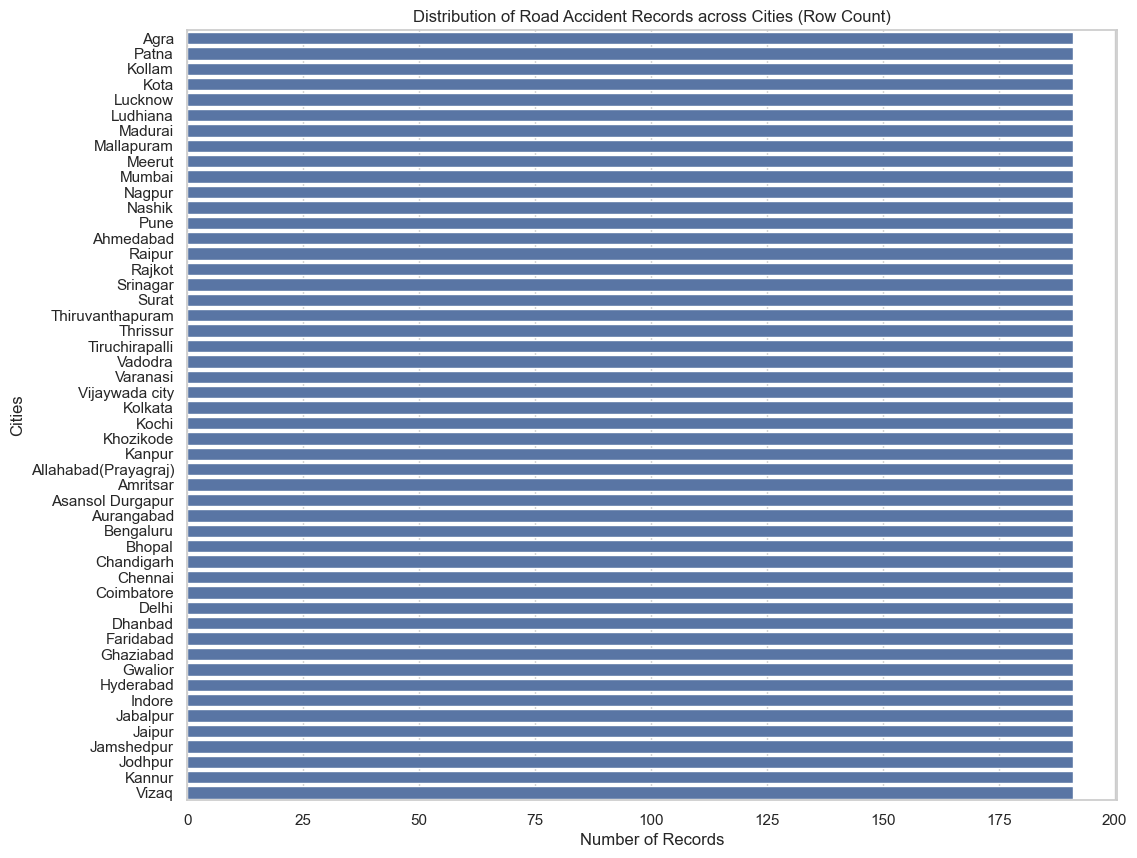

In [59]:
# EDA: Distribution of records across cities
# This plot shows number of rows, NOT sum of accident count

plt.figure(figsize=(12, 10))
sns.countplot(
    y="Million Plus Cities",
    data=df_cleaned,
    order=df_cleaned["Million Plus Cities"].value_counts().index
)
plt.title("Distribution of Road Accident Records across Cities (Row Count)")
plt.xlabel("Number of Records")
plt.ylabel("Cities")
plt.show()


Million Plus Cities
Chennai      26334
Delhi        25068
Bengaluru    19398
Jabalpur     19356
Indore       18216
Bhopal       13770
Hyderabad    12384
Jaipur       11640
Mumbai       10872
Gwalior      10794
Name: Count, dtype: int64

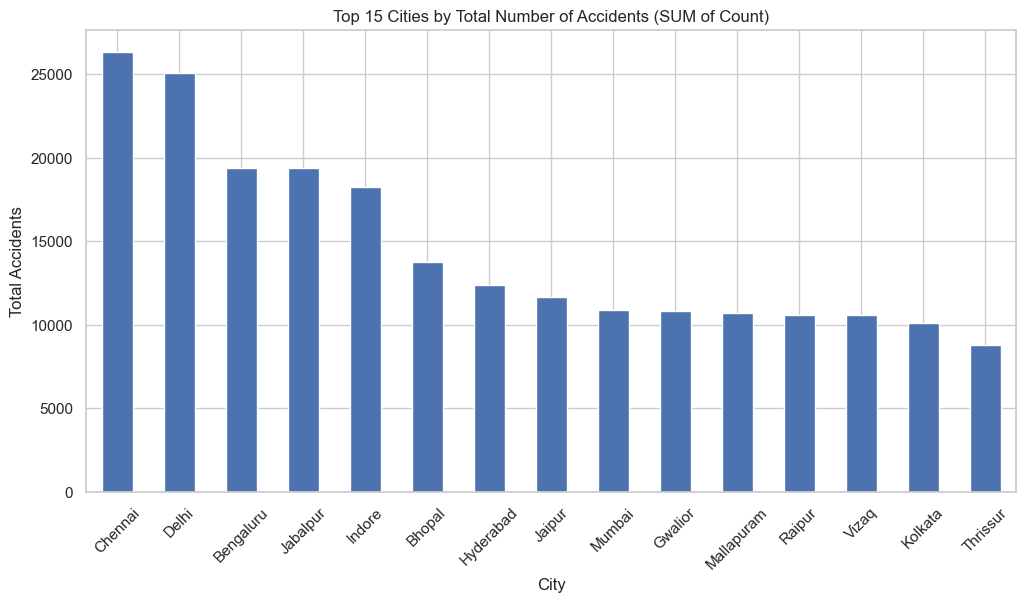

In [60]:
# Real accident magnitude analysis:
# Top cities by total number of accidents (sum of Count)

acc_city = (
    df_cleaned[df_cleaned["Outcome of Incident"] == "Total number of Accidents"]
    .groupby("Million Plus Cities")["Count"]
    .sum()
    .sort_values(ascending=False)
)

display(acc_city.head(10))

#Plot

acc_city.head(15).plot(kind="bar")
plt.title("Top 15 Cities by Total Number of Accidents (SUM of Count)")
plt.xlabel("City")
plt.ylabel("Total Accidents")
plt.xticks(rotation=45)
plt.show()


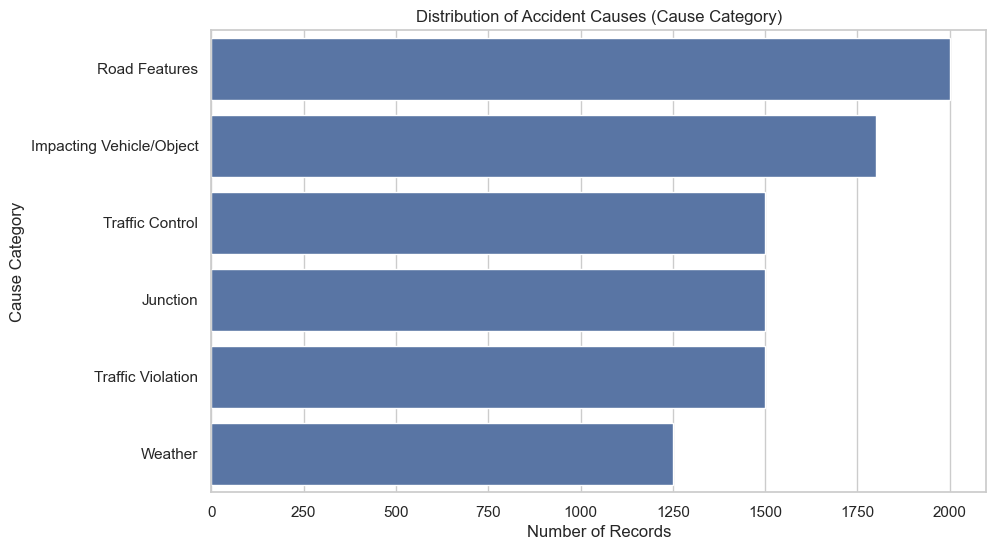

In [61]:
# EDA: Cause Category distribution (record count)

plt.figure(figsize=(10, 6))
sns.countplot(
    y="Cause category",
    data=df_cleaned,
    order=df_cleaned["Cause category"].value_counts().index
)
plt.title("Distribution of Accident Causes (Cause Category)")
plt.xlabel("Number of Records")
plt.ylabel("Cause Category")
plt.show()


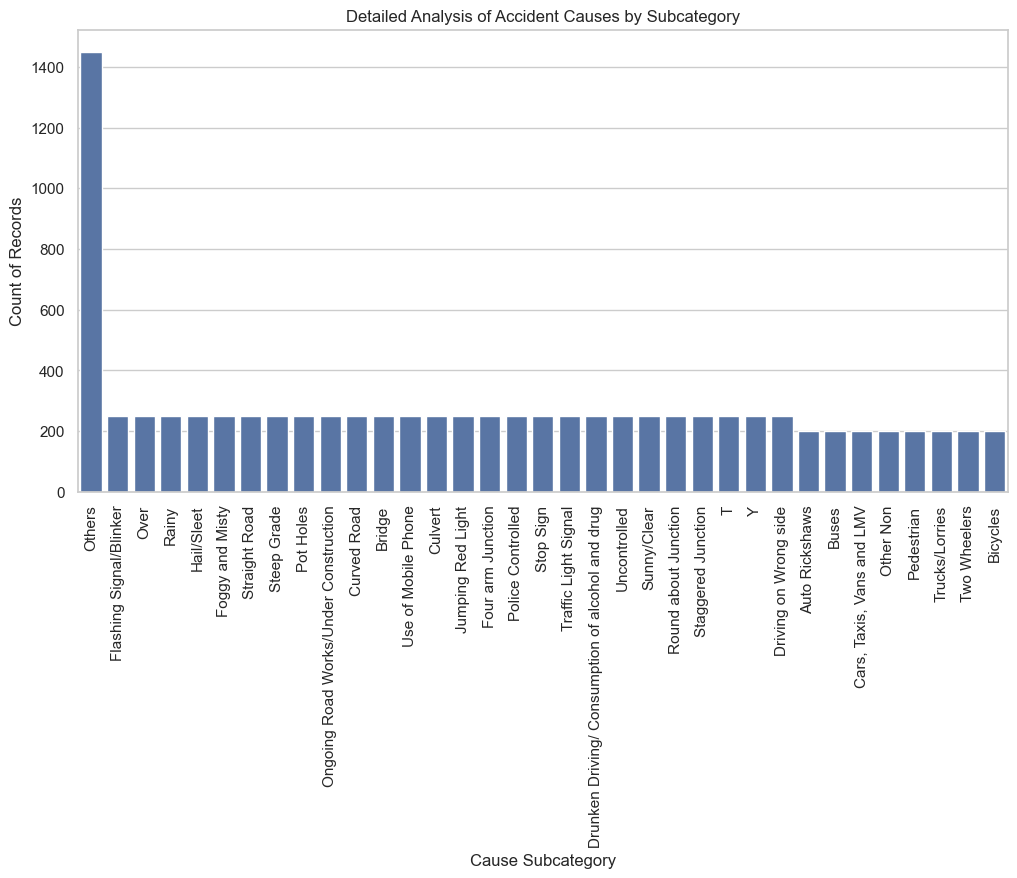

In [62]:
# EDA: Detailed subcategory distribution
# 'Others' is expected to dominate

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_cleaned,
    x="Cause Subcategory",
    order=df_cleaned["Cause Subcategory"].value_counts().index
)
plt.title("Detailed Analysis of Accident Causes by Subcategory")
plt.xlabel("Cause Subcategory")
plt.ylabel("Count of Records")
plt.xticks(rotation=90)
plt.show()


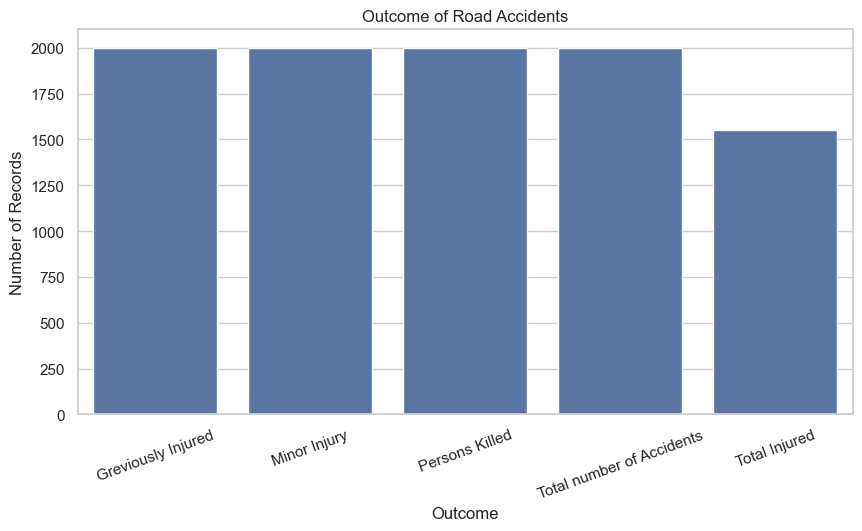

In [63]:
# EDA: Outcome distribution (record count)

plt.figure(figsize=(10, 5))
sns.countplot(
    x="Outcome of Incident",
    data=df_cleaned,
    order=df_cleaned["Outcome of Incident"].value_counts().index
)
plt.title("Outcome of Road Accidents")
plt.xlabel("Outcome")
plt.ylabel("Number of Records")
plt.xticks(rotation=20)
plt.show()


Outcome of Incident,Greviously Injured,Minor Injury,Persons Killed,Total Injured,Total number of Accidents
Cause category,,,,,
Impacting Vehicle/Object,20532.0,29983.0,13542.0,0.0,58736.0
Junction,20532.0,29983.0,13542.0,50515.0,58736.0
Road Features,20532.0,29983.0,13540.0,50515.0,58736.0
Traffic Control,20532.0,29983.0,13542.0,50515.0,58736.0
Traffic Violation,20532.0,29983.0,13542.0,50515.0,58736.0
Weather,20532.0,29983.0,13542.0,50515.0,58736.0


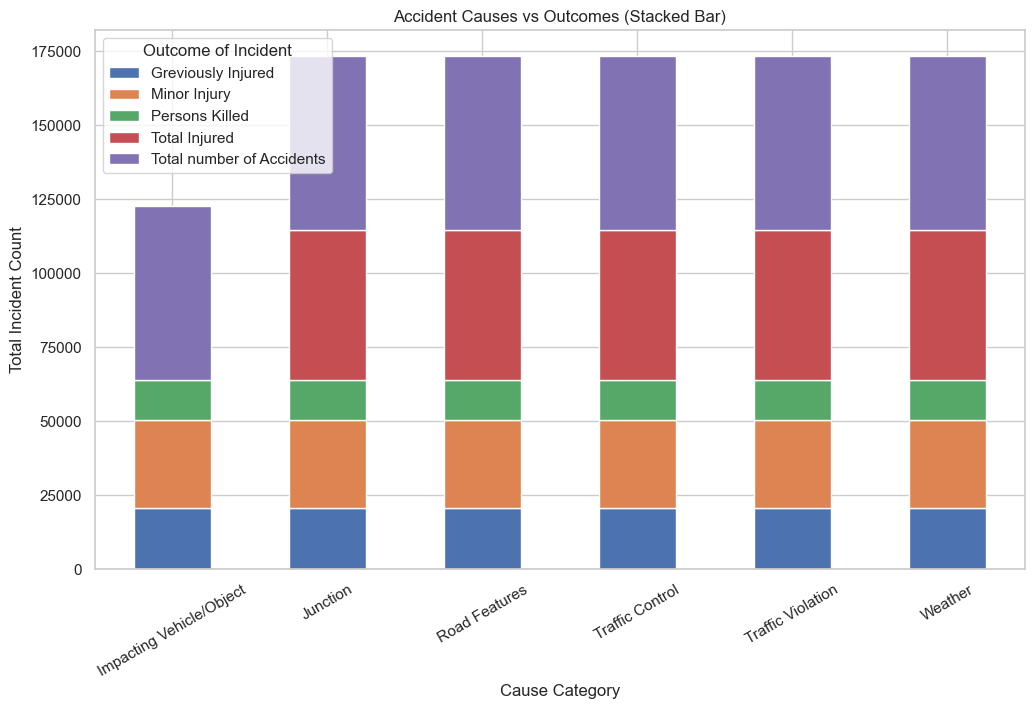

In [64]:
# Cause category vs outcome analysis
# This uses SUM of Count -> meaningful impact analysis

outcome_vs_cause = (
    df_cleaned.groupby(["Cause category", "Outcome of Incident"])["Count"]
    .sum()
    .unstack()
    .fillna(0)
)

display(outcome_vs_cause)

# Stacked bar plot

outcome_vs_cause.plot(kind="bar", stacked=True, figsize=(12, 7))
plt.title("Accident Causes vs Outcomes (Stacked Bar)")
plt.xlabel("Cause Category")
plt.ylabel("Total Incident Count")
plt.xticks(rotation=30)
plt.show()


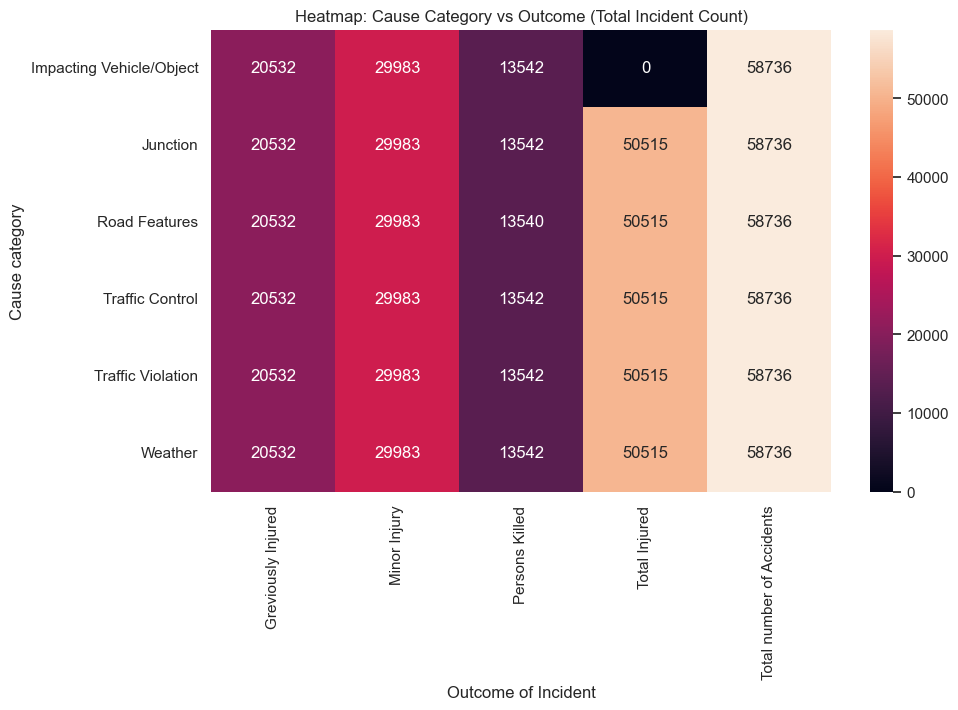

In [65]:
# Heatmap for easier comparison: Cause Category vs Outcome

plt.figure(figsize=(10, 6))
sns.heatmap(outcome_vs_cause, annot=True, fmt=".0f")
plt.title("Heatmap: Cause Category vs Outcome (Total Incident Count)")
plt.xlabel("Outcome of Incident")
plt.ylabel("Cause category")
plt.show()


,Total_Accidents,Persons_Killed,Fatality_Ratio
Million Plus Cities,,,
Asansol Durgapur,2568,1890,0.735981
Ludhiana,2508,1698,0.677033
Amritsar,600,396,0.660000
Agra,5436,3084,0.567329
Dhanbad,984,498,0.506098
Jodhpur,1752,852,0.486301
Patna,2238,1086,0.485255
Meerut,4350,2094,0.481379
Varanasi,2670,1278,0.478652


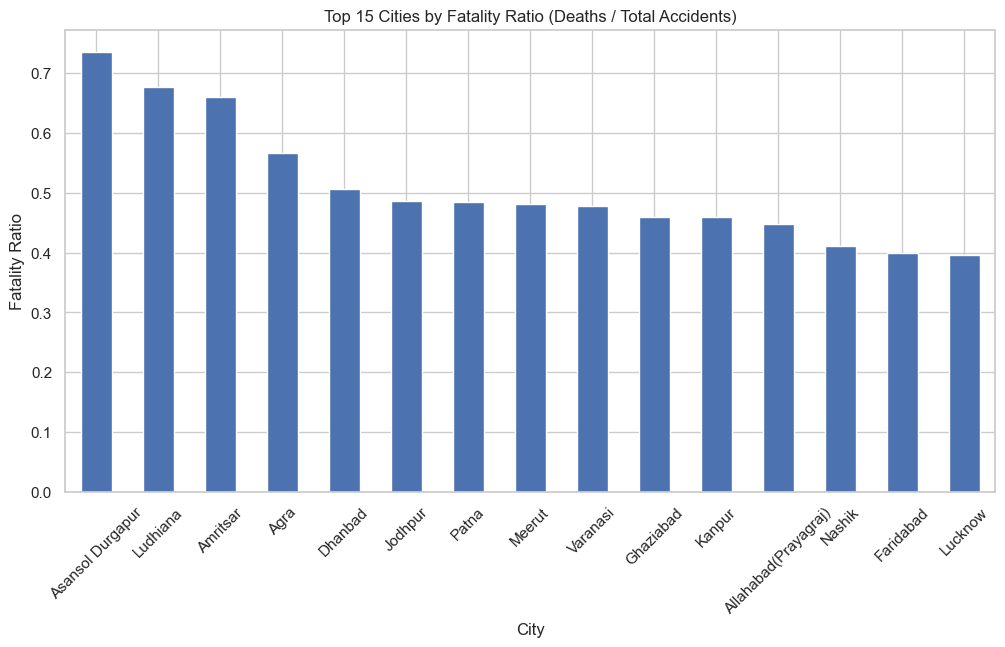

In [66]:
# Fatality Ratio = deaths / total accidents
# This helps identify cities with more severe accidents

death_city = (
    df_cleaned[df_cleaned["Outcome of Incident"] == "Persons Killed"]
    .groupby("Million Plus Cities")["Count"]
    .sum()
    .sort_values(ascending=False)
)

fatality_df = pd.concat([acc_city, death_city], axis=1)
fatality_df.columns = ["Total_Accidents", "Persons_Killed"]
# Handle missing
fatality_df = fatality_df.fillna(0)

# Compute ratio (avoid division by zero)
fatality_df["Fatality_Ratio"] = fatality_df["Persons_Killed"] / fatality_df["Total_Accidents"]
fatality_df = fatality_df.replace([np.inf, -np.inf], 0).fillna(0)

display(fatality_df.sort_values("Fatality_Ratio", ascending=False).head(10))

# Plot
fatality_df.sort_values("Fatality_Ratio", ascending=False)["Fatality_Ratio"].head(15).plot(kind="bar")
plt.title("Top 15 Cities by Fatality Ratio (Deaths / Total Accidents)")
plt.xlabel("City")
plt.ylabel("Fatality Ratio")
plt.xticks(rotation=45)
plt.show()


In [67]:
# Create ML dataset by restricting to: Outcome = Total number of Accidents
# Reason: Injuries and deaths create noise. This makes ML more meaningful.

df_model = df_cleaned[df_cleaned["Outcome of Incident"] == "Total number of Accidents"].copy()

print("Original dataset shape:", df_cleaned.shape)
print("ML dataset shape      :", df_model.shape)

df_model.head()


Original dataset shape: (9550, 5)
ML dataset shape      : (2000, 5)


,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0
9,Agra,Traffic Control,Others,Total number of Accidents,470
14,Agra,Traffic Control,Police Controlled,Total number of Accidents,0
19,Agra,Traffic Control,Stop Sign,Total number of Accidents,0
24,Agra,Traffic Control,Traffic Light Signal,Total number of Accidents,66


In [68]:
# Define input features (X) and target variable (y)
# Target: accident count

X = df_model[["Million Plus Cities", "Cause category", "Cause Subcategory"]]
y = df_model["Count"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2000, 3)
y shape: (2000,)


In [69]:
# Split dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (1600, 3)
Test shape : (400, 3)


In [70]:
# Encode categorical features
# OneHotEncoder converts text into numeric columns
# handle_unknown='ignore' avoids errors in test data

categorical_features = ["Million Plus Cities", "Cause category", "Cause Subcategory"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

print("Preprocessor created")


Preprocessor created


In [71]:
# Build ML pipelines for tree-based regression models:
# 1) Decision Tree Regressor
# 2) Random Forest Regressor

pipelines = {
    "Decision Tree": Pipeline([
        ("preprocess", preprocessor),
        ("model", DecisionTreeRegressor(random_state=42))
    ]),
    
    "Random Forest": Pipeline([
        ("preprocess", preprocessor),
        ("model", RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1))
    ])
}

print("Pipelines created for 2 models")


Pipelines created for 2 models


In [72]:
# Train and evaluate all models
# Metrics:
# MAE, RMSE, R²

results = []

for name, pipe in pipelines.items():
    # Train
    pipe.fit(X_train, y_train)
    
    # Predict
    y_pred = pipe.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
results_df.sort_values("R2", ascending=False)


,Model,MAE,RMSE,R2
1,Random Forest,134.496858,353.001192,0.225363
0,Decision Tree,143.315000,373.282226,0.133795


In [73]:
# Use Random Forest as final model

final_model = pipelines["Random Forest"]
final_model.fit(X_train, y_train)

# Sample prediction
sample_input = pd.DataFrame([{
    "Million Plus Cities": "Delhi",
    "Cause category": "Traffic Violation",
    "Cause Subcategory": "Drunken Driving/ Consumption of alcohol and drug"
}])

pred = final_model.predict(sample_input)[0]
print("Predicted Total Accidents:", int(pred))


Predicted Total Accidents: 151


In [74]:
# Feature importance from Random Forest
# This helps interpret what factors influence accident counts

# Get feature names after one-hot encoding
feature_names = final_model.named_steps["preprocess"].get_feature_names_out()

# Get importance values
importances = final_model.named_steps["model"].feature_importances_

# Create dataframe
fi = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print("Top 15 important features affecting accident count:")
display(fi.head(15))


Top 15 important features affecting accident count:


,Feature,Importance
83,cat__Cause Subcategory_Sunny/Clear,0.084954
73,cat__Cause Subcategory_Over,0.083149
6,cat__Million Plus Cities_Bengaluru,0.075178
17,cat__Million Plus Cities_Indore,0.071139
82,cat__Cause Subcategory_Straight Road,0.060930
11,cat__Million Plus Cities_Delhi,0.057704
9,cat__Million Plus Cities_Chennai,0.055485
18,cat__Million Plus Cities_Jabalpur,0.053327
72,cat__Cause Subcategory_Others,0.051260
87,cat__Cause Subcategory_Two Wheelers,0.038728


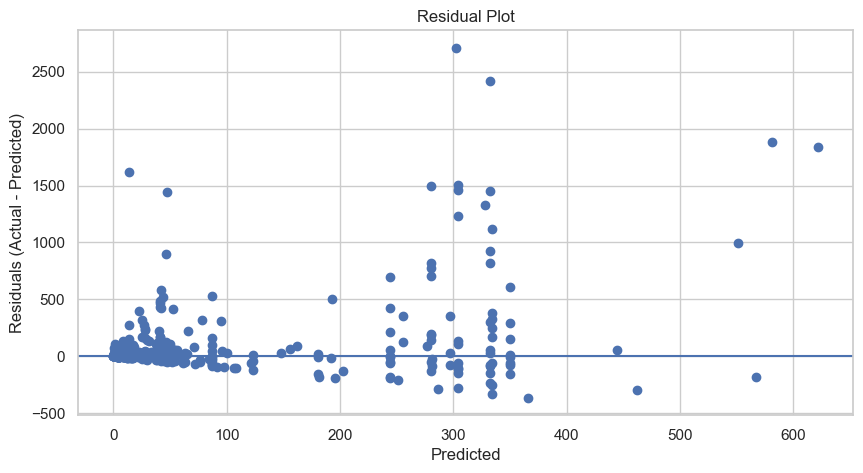

In [75]:
y_pred = final_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.title("Residual Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

## Conclusion: 

- Performed EDA to understand accident distribution across cities and causes.
- Identified top accident-prone cities and key cause categories.
- Computed fatality ratio to measure accident severity city-wise.
- Built multiple regression models and compared them using MAE, RMSE and R².
- Random Forest performed best due to its ability to capture non-linear patterns.
- Feature importance analysis helped interpret which factors contributed most to accident counts.

## Limitations
- Dataset is aggregated and categorical; it lacks time-based variables (hour, day, month).
- No population/vehicle density, road length, traffic flow, or enforcement data.
- Many records are grouped into 'Others' subcategory.

## Future Work
- Add external features (population, vehicle registrations, traffic density).
- Train boosting models (XGBoost/LightGBM).
- Convert problem to severity classification (High vs Low accidents).